# Simple and Multiple linear regression

In [20]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import the dataset
data = pd.read_csv("Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## TV Simple Linear Model

In [21]:
# Select and reshape data
x = data.iloc[:,0].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

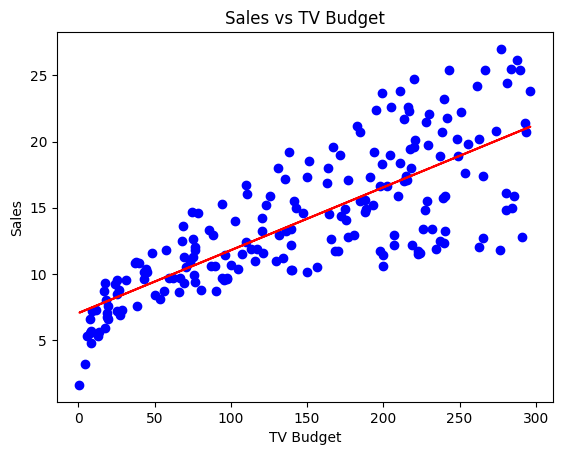

In [22]:
# Create an empty linear regression model 
tv_model = LinearRegression()

# Create the model using fit(x,y)
tv_model.fit(x,y)

# Use model to make a prediction
y_pred = tv_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,tv_model.predict(x),color = 'r')
plt.title('Sales vs TV Budget')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.show()


In [ ]:
# TV model coefficients
print('Coefficients: \n', tv_model.coef_)

Coefficients: 
 [[0.04753664]]


## Radio Simple Linear Model

In [23]:
# Select and reshape data
x = data.iloc[:,1].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

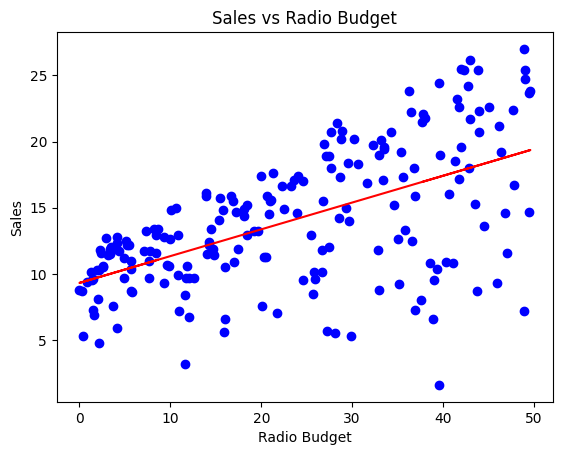

In [24]:
# Create an empty linear regression model 
radio_model = LinearRegression()

# Create the model using fit(x,y)
radio_model.fit(x,y)

# Use model to make a prediction
y_pred = radio_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,radio_model.predict(x),color = 'r')
plt.title('Sales vs Radio Budget')
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.show()


In [27]:
# Radio model coefficients
print('Coefficients: \n', radio_model.coef_)

Coefficients: 
 [[0.20249578]]


## Newspaper Simple Linear model

In [ ]:
# Select and reshape data
x = data.iloc[:,2].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

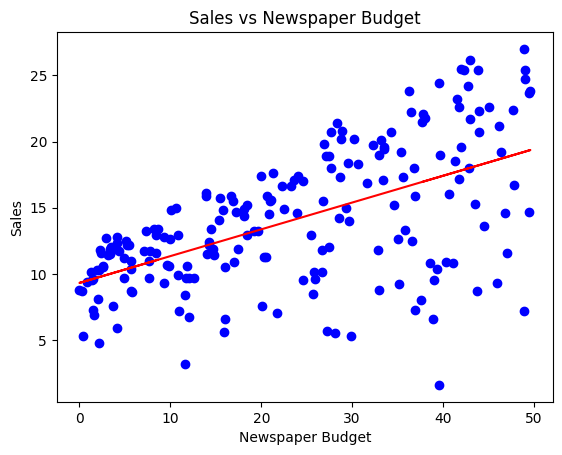

In [25]:
# Create an empty linear regression model 
newspaper_model = LinearRegression()

# Create the model using fit(x,y)
newspaper_model.fit(x,y)

# Use model to make a prediction
y_pred = newspaper_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,newspaper_model.predict(x),color = 'r')
plt.title('Sales vs Newspaper Budget')
plt.xlabel('Newspaper Budget')
plt.ylabel('Sales')
plt.show()


In [26]:
# Newspaper model coefficients
print('Coefficients: \n', newspaper_model.coef_)

Coefficients: 
 [[0.20249578]]


## Multiple Linear Regression

In [28]:
X = data.iloc[:,[0, 1, 2]].values
X[1:4]

array([[ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5]])

In [29]:
# Select and reshape data
y = data.iloc[:,3].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# Create an empty linear regression model
advertising_model = LinearRegression()

# Create the model using fit(X,y)
advertising_model.fit(X,y)

# Get intercept and coefficients
print('Intercept: \n', advertising_model.intercept_)
print('Coefficients: \n', advertising_model.coef_)


Intercept: 
 [2.93888937]
Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]


## Training and test samples

In [30]:
# Split data into training and test sets
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (150, 3) (150, 1)
Test data: (50, 3) (50, 1)


### Feature Scaling: Recap

Recall feature scaling is the process of manipulating feature values so that they all fall within a similar range. If you have one feature being anywhere between 0-1000 and another feature being anywhere from 0-0.1, then you have a scaling issue. The first feature would naturally be prioritised, as it contributes the most to error.

Therefore, we want to ensure that all features are on the same scale. This is the process of feature scaling. There are two ways we can scale features: normalisation, or standardisation.

Standardisation is a type of scaling that will shift your values to have a mean of 0 and a standard deviation of 1. This way, most of your features will be between -1 and 1. However, it is possible for some outliers to go a bit higher. Standardisation is a great form of feature scaling, but works best with features that follow a Gaussian (normal) distribution.

Normalisation is simply the process of (a) subtracting the minimum value of the dataset and (b) dividing by the range of the dataset (which is max - min). This ensures that your smallest value is always 0 and your largest value is always 1. This is less optimal than standardisation, but doesn't require your data to be a Gaussian.

With all this in mind, let's take a look at the statistical distribution of our data.

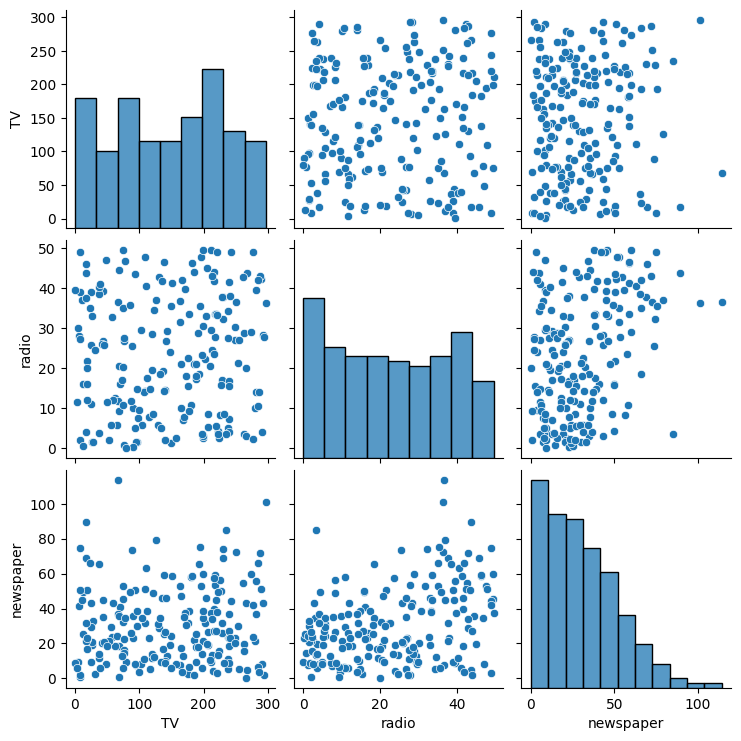

In [31]:
# Plot the distribution of the data
sns.pairplot(data=data.drop('sales', axis=1))

Looks like the features don't follow a Gaussian distribution. Let's normalise our data using `MinMaxScaler`. Note that we fit it on the training set; we don't want to fit anything on the test set.

In [32]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Using a 0.25 test size split our data of 200 items into a training set of 150 observations and three columns, and a test set of 50 observations. 

We can use this to evaluate our model.


### Fit the model on the training data


In [33]:
# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)


Intercept: 
 [3.03123996]
Coefficients: 
 [[13.45518042  8.82700262  0.19358528]]


In [34]:
# Predictions
predictions[0:5]


array([[10.15914647],
       [21.58406999],
       [18.62679322],
       [13.65075552],
       [18.3315086 ]])

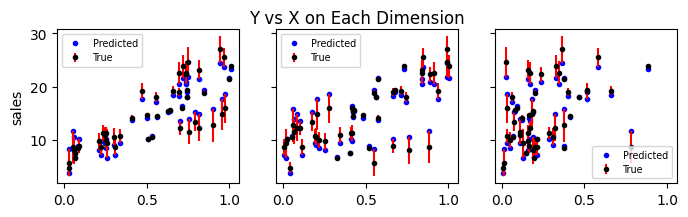

In [35]:
## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(data.columns[3])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

The red lines indicate the error of the prediction from the actual observations. The black dots represent true values, and the blue dots represent predicted values. You will notice that, at the end of the red lines, either at the top or bottom, is a blue dot. In other words, you can read the red error line as the distance deviated from the true values. The reason why there is a red line either side of the black dot is to show that the error may be within that line, either above or below.

Sklearn's `LinearRegression` provides the R squared score for its models.

In [36]:
# R squared score
print ("R2 Score:", round (model.score(X_test, y_test), 4))


R2 Score: 0.9197


This score is quite close to 1, which suggests that our model fits our observations quite well.